In [1]:
import torch
import LotkaVolterra
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)


Python version
3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Version info.
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


In [3]:
import os

print(os.getcwd())

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/lotka_volterra


In [4]:
theta_true = torch.tensor([0.01,0.5,1,0.01]).log()

LV_model = LotkaVolterra.LotkaVolterra(1)

In [5]:
torch.manual_seed(7)
path = LV_model.gen_single(theta_true)

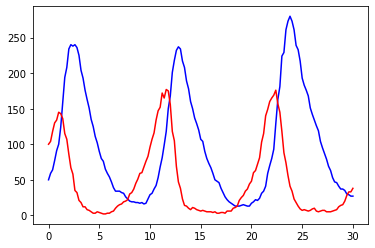

In [6]:
time_gird = np.arange(0,LV_model.dur+LV_model.dt, LV_model.dt)

plt.figure()
plt.plot(time_gird, path[0,:], "b")
plt.plot(time_gird, path[1,:], "r")

In [7]:
import time

start = time.time()

theta_batch = theta_true.repeat(10,1)

paths = LV_model.model_sim_paths(theta_batch)

end = time.time()
run_time = end - start
print(run_time)


8.550202369689941


In [8]:

for p in paths:
    print(p.shape[1])


151
151
151
151
151
151
151
151
151
151


In [9]:
plt.figure()
for p in paths:
    plt.plot(time_gird, p[0,:], "b", alpha = 0.4)
    plt.plot(time_gird, p[1,:], "r", alpha = 0.4)

In [19]:
s_of_paths = LotkaVolterra.calc_summary_stats(paths)

In [20]:
s_of_paths.shape

torch.Size([10, 9])

In [21]:
import functions as func

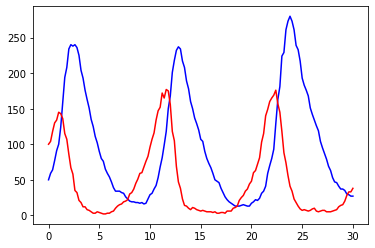

In [22]:
x_o, model, theta_true = func.set_up_model()


plt.figure()
plt.plot(time_gird, x_o[0,:], "b")
plt.plot(time_gird, x_o[1,:], "r")

In [23]:
theta_prior = model.prior.sample(sample_shape=(10,))

paths_prior = LV_model.model_sim_paths(theta_prior)

Simulation too long!


In [30]:
for p in paths_prior:
    print(p.shape[1])


151
151
151
151
151
151
151
151
151
151


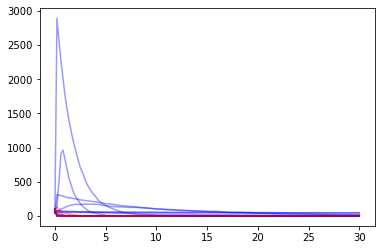

In [31]:
plt.figure()
for p in paths_prior:
    plt.plot(time_gird, p[0,:], "b", alpha = 0.4)
    plt.plot(time_gird, p[1,:], "r", alpha = 0.4)


In [32]:
s_of_paths = LotkaVolterra.calc_summary_stats(paths)

In [36]:
s_of_paths.mean(dim = 0).shape


torch.Size([9])

In [37]:
start = time.time()

mu_s, std_s = func.gen_summary_stats_mean_and_std(model,nbr_sim=1000)

end = time.time()
run_time = end - start
print(run_time)


Running 1000 simulations: 100%|██████████| 1000/1000 [04:29<00:00,  3.71it/s]


Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation to

In [38]:
m_s_of_prior, s_s_of_prior = func.load_summary_stats_mean_and_std()


In [39]:
m_s_of_prior

tensor([ 2.1122e+02,  1.1066e+01,  2.2945e+00,  2.2945e+00,  1.1103e+03,
         1.0423e+03,  1.4661e-01,  8.4424e-02, -1.4592e+00])

In [40]:
s_s_of_prior

tensor([6.2868e+02, 8.3149e+01, 7.4741e-01, 7.4741e-01, 7.4330e+03, 7.0902e+03,
        2.7662e-01, 2.0652e-01, 6.3111e+00])

In [41]:
s_of_theta = model.model_sim(theta_prior)


Simulation too long!


In [42]:
s_of_theta = func.normalize_summary_stats(s_of_theta, m_s_of_prior, s_s_of_prior)


In [43]:
s_of_theta

tensor([[-0.2622, -0.1251, -0.2649, -0.2649, -0.1493, -0.1470, -0.5302, -0.4092,
          0.2370],
        [-0.2664, -0.1055,  0.5959,  0.5959, -0.1374, -0.1363,  2.1605,  1.1796,
          0.6549],
        [-0.2620, -0.1251, -0.2649, -0.2649, -0.1494, -0.1470, -0.5302, -0.4092,
          0.2368],
        [-0.3346, -0.1251, -0.2649, -0.2649, -0.1493, -0.1470, -0.5302, -0.4092,
          0.3096],
        [-0.2974, -0.1251, -0.2649, -0.2649, -0.1487, -0.1463, -0.5302, -0.4092,
          0.2722],
        [-0.3344, -0.1251, -0.2649, -0.2649, -0.1493, -0.1470, -0.5302, -0.4092,
          0.3094],
        [-0.1208, -0.1251, -0.2649, -0.2649, -0.1185, -0.1156, -0.5302, -0.4092,
          0.0952],
        [-0.2332, -0.0792,  0.6352,  0.6352, -0.1483, -0.1459,  2.6144,  3.1995,
          0.3117],
        [-0.0650, -0.1251, -0.2649, -0.2649,  0.2719,  0.2437, -0.5302, -0.4092,
          0.0392],
        [-0.3355, -0.1251, -0.2649, -0.2649, -0.1494, -0.1470, -0.5302, -0.4092,
          0.3104]])

In [23]:
def simulator(theta):

    s_of_theta = model.model_sim(theta)

    return func.normalize_summary_stats(s_of_theta, m_s_of_prior, s_s_of_prior)


In [24]:
s_of_theta = simulator(theta_prior)

Simulation too long!


In [25]:
s_of_theta

tensor([[-0.2607, -0.1251, -0.2649, -0.2649, -0.1494, -0.1470, -0.5302, -0.4092,
          0.2355],
        [-0.2714, -0.1012,  0.7575,  0.7575, -0.1407, -0.1394,  2.2627,  1.3427,
          0.6057],
        [-0.2630, -0.1251, -0.2649, -0.2649, -0.1494, -0.1470, -0.5302, -0.4092,
          0.2378],
        [-0.3346, -0.1251, -0.2649, -0.2649, -0.1493, -0.1470, -0.5302, -0.4092,
          0.3096],
        [-0.2995, -0.1251, -0.2649, -0.2649, -0.1484, -0.1460, -0.5302, -0.4092,
          0.2744],
        [-0.3345, -0.1251, -0.2649, -0.2649, -0.1493, -0.1470, -0.5302, -0.4092,
          0.3095],
        [-0.1856, -0.1251, -0.2649, -0.2649, -0.1352, -0.1325, -0.5302, -0.4092,
          0.1601],
        [-0.2161, -0.0875,  0.5846,  0.5846, -0.1480, -0.1456,  2.5596,  3.0917,
          0.3001],
        [ 0.0032, -0.1251, -0.2649, -0.2649,  0.5144,  0.4674, -0.5302, -0.4092,
         -0.0292],
        [-0.3355, -0.1251, -0.2649, -0.2649, -0.1494, -0.1470, -0.5302, -0.4092,
          0.3104]])

In [57]:
from sbi.inference import SMCABC, prepare_for_sbi

In [63]:
# calc summary stats for obs data
s_x_o = LotkaVolterra.calc_summary_stats(x_o.reshape(1,x_o.shape[0],x_o.shape[1]))
s_x_o = func.normalize_summary_stats(s_x_o,m_s_of_prior, s_s_of_prior)

In [64]:
simulator, prior = prepare_for_sbi(simulator, model.prior)

inference = SMCABC(simulator, prior, show_progress_bars=False)

Simulation too long!
Simulation too long!


In [65]:
print("ABC-SMC 1k")

posterior_1k = inference(s_x_o, num_particles=50, num_initial_pop=50, num_simulations=500, epsilon_decay=0.8,return_summary=False)


ABC-SMC 1k
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Simulation too long!
Si

In [67]:
from torch.distributions.multivariate_normal import MultivariateNormal

def fit_gaussian_dist(post_samples):

    post_samples_np = post_samples.numpy()

    mean = np.mean(post_samples_np, axis=0)
    cov = np.cov(post_samples_np, rowvar=0)

    return MultivariateNormal(loc = torch.from_numpy(mean).to(dtype=torch.float32),
                              covariance_matrix= torch.from_numpy(cov).to(dtype=torch.float32))

In [68]:
posterior_samples = posterior_1k.sample_n(1000)


/home/samuel/anaconda3/envs/py374/lib/python3.7/site-packages/torch/distributions/distribution.py:134: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


In [69]:
posterior_samples

tensor([[-2.8298,  1.9832,  0.4640, -3.2931],
        [-4.0395, -2.6472, -2.7844, -3.5748],
        [-3.6844, -1.5723,  1.5303, -3.1210],
        ...,
        [-3.6029, -2.1226, -3.8223, -3.3698],
        [-2.4454, -4.5539, -0.5662, -3.1010],
        [-4.0395, -2.6472, -2.7844, -3.5748]])

In [70]:
posterior_samples_gauss_approx = fit_gaussian_dist(posterior_samples)


In [73]:
-posterior_samples_gauss_approx.log_prob(theta_true)

tensor(6.4293)